In [4]:
!pip install /Users/vigneshkrishnan/Downloads/pytorchfi-master

Processing /Users/vigneshkrishnan/Downloads/pytorchfi-master
  Preparing metadata (setup.py) ... done
  Created wheel for pytorchfi_mod_test: filename=pytorchfi_mod_test-0.3-py3-none-any.whl size=19364 sha256=60b81ddaee72d9fe5ca8ae49cf37a102a448d9e8e8fcc3fea0335e958958cf86
  Stored in directory: /Users/vigneshkrishnan/Library/Caches/pip/wheels/1e/a8/08/b3d2573f3a3cc63117c8b7d1bb51212f591c70e20822c2ebc5
Successfully built pytorchfi_mod_test
  Attempting uninstall: pytorchfi_mod_test
    Found existing installation: pytorchfi_mod_test 0.3
    Uninstalling pytorchfi_mod_test-0.3:
      Successfully uninstalled pytorchfi_mod_test-0.3


In [ ]:


# Flatten the list of lists
flattened_data = [item for sublist in data for item in sublist]

# Dictionary to accumulate sums and counts
average_dict = {}

# Accumulate sums and counts for each key
for key, value in flattened_data:
    if key in average_dict:
        average_dict[key].append(value)
    else:
        average_dict[key] = [value]

# Calculate averages
averages = [[key, sum(values) / len(values)] for key, values in average_dict.items()]
averages.sort()  # Optional, sort by the key for better readability

# Print or return the result
print(averages)

In [1]:
import pytorchfi_mod_test-0.3

SyntaxError: invalid syntax (3891662832.py, line 1)

In [5]:
from pytorchfi_mod_test.core import fault_injection

ModuleNotFoundError: No module named 'pytorchfi_mod_test'

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
import torch.nn as nn
import torch.optim as optim

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for computation.")

# Normalization parameters for pretrained models
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit the input size of ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR-100 dataset
trainset = CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = CIFAR100(root='./data', train=False, download=True, transform=transform)

# DataLoader setup
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Load pretrained ResNet-18
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the layers in the pretrained model
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes

model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Training the model
model.train()
for epoch in range(1):  # Training for 10 epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
            
        if i==10:
            break

print('Finished Training')

# Evaluating the model for dog detection in CIFAR-100
model.eval()
class_correct = 0
class_total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels) & (labels == 27)  # Index 27 is for dogs in CIFAR-100
        class_correct += c.sum().item()
        class_total += (labels == 27).sum().item()

accuracy = 100 * class_correct / class_total if class_total > 0 else 0
print(f'Accuracy of identifying dog images in the test set: {accuracy:.2f}%')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <F8622D92-25A9-3A61-A089-C917FDA36C1B> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Using cpu for computation.
Files already downloaded and verified
Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finished Training


KeyboardInterrupt: 

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
import torch.nn as nn
import torch.optim as optim

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for computation.")

# Normalization parameters for pretrained models
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit the input size of ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR-100 dataset
trainset = CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = CIFAR100(root='./data', train=False, download=True, transform=transform)

# DataLoader setup
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Load pretrained ResNet-18
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the layers in the pretrained model
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes

model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Training the model
model.train()
for epoch in range(1):  # Adjusted to 1 epoch for simplicity
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
            
        if i==10:
            break

print('Finished Training')

# Streamlined testing part
model.eval()
correct_dogs = 0
total_dogs = 0

# Test only the first batch for quick evaluation
data = next(iter(testloader))
images, labels = data[0].to(device), data[1].to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
correct_dogs += ((predicted == labels) & (labels == 27)).sum().item()  # Index 27 is for dogs
total_dogs += (labels == 27).sum().item()

if total_dogs > 0:
    accuracy = 100 * correct_dogs / total_dogs
else:
    accuracy = 0
print(f'Accuracy of identifying dog images in the test set: {accuracy:.2f}%')


Using cpu for computation.
Files already downloaded and verified
Files already downloaded and verified
Finished Training
Accuracy of identifying dog images in the test set: 0.00%


In [8]:
data = next(iter(testloader))

data[0]


tensor([[[[ 1.2899,  1.2899,  1.2899,  ...,  1.7180,  1.7180,  1.7180],
          [ 1.2899,  1.2899,  1.2899,  ...,  1.7180,  1.7180,  1.7180],
          [ 1.2899,  1.2899,  1.2899,  ...,  1.7180,  1.7180,  1.7180],
          ...,
          [-0.7479, -0.7479, -0.7479,  ...,  0.8961,  0.8961,  0.8961],
          [-0.7479, -0.7479, -0.7479,  ...,  0.8961,  0.8961,  0.8961],
          [-0.7479, -0.7479, -0.7479,  ...,  0.8961,  0.8961,  0.8961]],

         [[ 1.7283,  1.7283,  1.7283,  ...,  2.0609,  2.0609,  2.0609],
          [ 1.7283,  1.7283,  1.7283,  ...,  2.0609,  2.0609,  2.0609],
          [ 1.7283,  1.7283,  1.7283,  ...,  2.0609,  2.0609,  2.0609],
          ...,
          [-0.5476, -0.5476, -0.5476,  ...,  0.8354,  0.8354,  0.8354],
          [-0.5476, -0.5476, -0.5476,  ...,  0.8354,  0.8354,  0.8354],
          [-0.5476, -0.5476, -0.5476,  ...,  0.8354,  0.8354,  0.8354]],

         [[ 2.5354,  2.5354,  2.5354,  ...,  2.5877,  2.5877,  2.5877],
          [ 2.5354,  2.5354,  

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
import torch.nn as nn
import torch.optim as optim

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for computation.")

# Normalization parameters for pretrained models
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 also expects 224x224 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load CIFAR-100 dataset
trainset = CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = CIFAR100(root='./data', train=False, download=True, transform=transform)

# DataLoader setup
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Load pretrained VGG16
model = torchvision.models.vgg16(pretrained=True)

# Freeze all the layers in the pretrained model
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes

model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier[6].parameters(), lr=0.001, momentum=0.9)

# Training the model
model.train()
for epoch in range(1):  # Limited to 1 epoch for brevity
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
        
        if i == 10:
            break

print('Finished Training')

# Streamlined testing part
model.eval()
correct_dogs = 0
total_dogs = 0

# Test only the first batch for quick evaluation
data = next(iter(testloader))
images, labels = data[0].to(device), data[1].to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
correct_dogs += ((predicted == labels) & (labels == 27)).sum().item()  # Index 27 is for dogs
total_dogs += (labels == 27).sum().item()

if total_dogs > 0:
    accuracy = 100 * correct_dogs / total_dogs
else:
    accuracy = 0
print(f'Accuracy of identifying dog images in the test set: {accuracy:.2f}%')


Using cpu for computation.
Files already downloaded and verified
Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/vigneshkrishnan/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:45<00:00, 12.1MB/s] 


Finished Training
Accuracy of identifying dog images in the test set: 0.00%


Files already downloaded and verified
Label: 19
Image tensor shape: torch.Size([3, 32, 32])
Image tensor data: tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  0.5294,  0.6627,  0.4275],
         [ 1.0000,  0.9922,  0.9922,  ...,  0.3333,  0.2627,  0.1451],
         [ 1.0000,  0.9922,  1.0000,  ...,  0.4824,  0.3020, -0.0510],
         ...,
         [ 0.1608,  0.1137,  0.0980,  ..., -0.7647, -0.4902, -0.4039],
         [-0.0431, -0.0588, -0.0118,  ..., -0.8275, -0.2392,  0.1059],
         [-0.3176, -0.3098, -0.2078,  ..., -0.7333, -0.1765,  0.0824]],

        [[ 1.0000,  1.0000,  1.0000,  ...,  0.6078,  0.7569,  0.5216],
         [ 1.0000,  0.9922,  0.9922,  ...,  0.3804,  0.3176,  0.2078],
         [ 1.0000,  0.9922,  1.0000,  ...,  0.5608,  0.3961,  0.0431],
         ...,
         [ 0.4510,  0.4275,  0.4039,  ..., -0.8667, -0.5137, -0.3961],
         [ 0.2314,  0.2157,  0.2549,  ..., -0.8745, -0.1216,  0.2627],
         [-0.0431, -0.0431,  0.0510,  ..., -0.7176,  0.0431,  0.3569]],

     

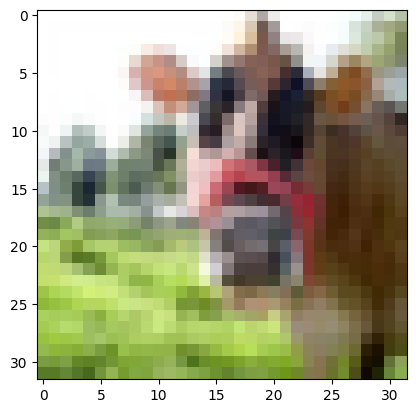

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations for the CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes the dataset
])

# Load CIFAR-100 dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Access an image and its label directly from the dataset
img, label = dataset[0]  # Get the first sample from the dataset

print(f'Label: {label}')  # Print the label
print(f'Image tensor shape: {img.shape}')  # Print the shape of the image tensor
print(f'Image tensor data: {img}')  # Optionally, print the image tensor data

# If you want to visualize the image
import matplotlib.pyplot as plt
import numpy as np

# Function to convert a normalized tensor to an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display the image
imshow(img)


In [11]:
model(img)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (512x49 and 25088x4096)

Using cpu for computation.
Files already downloaded and verified


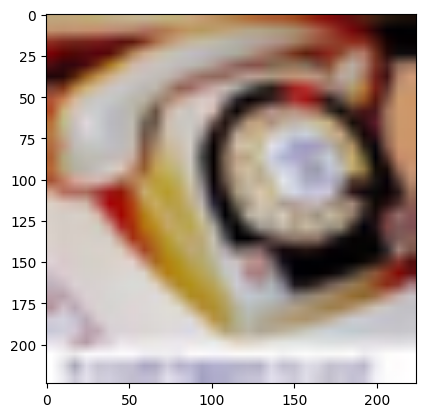

Predicted Label: 58, Class Name: pickup_truck


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for computation.")

# Define transformations for the CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit the input size of the model (e.g., ResNet)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes the dataset
])

# Load CIFAR-100 dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load pretrained model, for example, ResNet18
model = torchvision.models.resnet18(pretrained=True)

# Replace the final fully connected layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 100)  # Adjust for CIFAR-100

model.to(device)
model.eval()  # Set the model to evaluation mode

# Function to convert a normalized tensor to an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Access an image and its label
img, label = dataset[5]  # Get the first sample from the dataset

# Show the image
imshow(img)

# Prepare image for prediction (unsqueeze to add batch dimension)
img = img.unsqueeze(0).to(device)

# Predict the label of the image
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Retrieve the class name for the prediction (if class names are available)
class_names = dataset.classes
predicted_class = class_names[predicted.item()]

print(f'Predicted Label: {predicted.item()}, Class Name: {predicted_class}')


In [28]:
import torch
import torchvision.models as models

from pytorchfi.core import fault_injection

batch_size = 1
h = 224
w = 224
c = 3

pfi_model = fault_injection(model, 
                            batch_size,
                            input_shape=[c,h,w],
                            layer_types=[torch.nn.Conv2d],
                            use_cuda=False,
                            )

print(pfi_model.print_pytorchfi_layer_summary())

b, k, layer, C, H, W, err_val = [0], [0], [7], [4], [2], [4], [1000000]

# inj = pfi_model.declare_neuron_fi(batch=b, layer_num=layer, dim1=C, dim2=H, dim3=W, value=err_val)
inj = pfi_model.declare_weight_fi(layer_num=layer,k=k, dim1=C, dim2=H, dim3=W, value=err_val)

inj_output = inj(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()
print("[Single Error] PytorchFI label:", inj_label)

============================ PYTORCHFI INIT SUMMARY ==============================

Layer types allowing injections:
----------------------------------------------------------------------------------
   - Conv2d

Model Info:
----------------------------------------------------------------------------------
   - Shape of input into the model: (3 224 224 )
   - Batch Size: 1
   - CUDA Enabled: False

Layer Info:
----------------------------------------------------------------------------------
Layer #       Layer type  Dimensions         Weight Shape         Output Shape
----------------------------------------------------------------------------------
    0           Conv2d           4        [64, 3, 7, 7]    [1, 64, 112, 112]
    1           Conv2d           4       [64, 64, 3, 3]      [1, 64, 56, 56]
    2           Conv2d           4       [64, 64, 3, 3]      [1, 64, 56, 56]
    3           Conv2d           4       [64, 64, 3, 3]      [1, 64, 56, 56]
    4           Conv2d           

IndexError: index 2 is out of bounds for dimension 2 with size 1

Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 449, in format
    return self._format(record)
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 445, in _format
    return self._fmt % values
           ~~~~~~~~~~^~~~~~~~
KeyError: 'clientip'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Framew

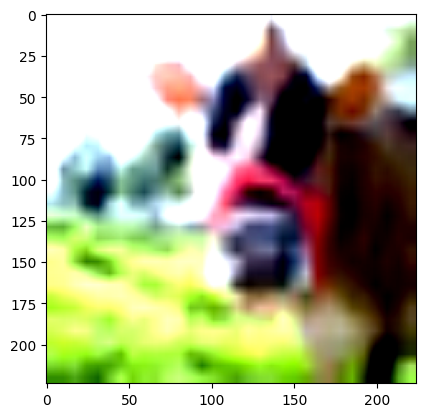

Predicted Label: 56, Class Name: palm_tree


In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading VGG16 pretrained model
model = torchvision.models.vgg16(pretrained=True)
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 100)
model.to(device)
model.eval()

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get an image and its label
img, label = dataset[0]
imshow(img)

# Prepare image for prediction
img = img.unsqueeze(0).to(device)

# Predict the label
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Output
class_names = dataset.classes
predicted_class = class_names[predicted.item()]
print(f'Predicted Label: {predicted.item()}, Class Name: {predicted_class}')


In [31]:
import torch
import torchvision.models as models

from pytorchfi.core import fault_injection

batch_size = 1
h = 224
w = 224
c = 3

pfi_model = fault_injection(model, 
                            batch_size,
                            input_shape=[c,h,w],
                            layer_types=[torch.nn.Conv2d],
                            use_cuda=False,
                            )

print(pfi_model.print_pytorchfi_layer_summary())

b, k, layer, C, H, W, err_val = [0], [0], [7], [4], [2], [4], [1000000]

inj = pfi_model.declare_neuron_fi(batch=b, layer_num=layer, dim1=C, dim2=H, dim3=W, value=err_val)
# inj = pfi_model.declare_weight_fi(layer_num=layer,k=k, dim1=C, dim2=H, dim3=W, value=err_val)

inj_output = inj(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()
print("[Single Error] PytorchFI label:", inj_label)

============================ PYTORCHFI INIT SUMMARY ==============================

Layer types allowing injections:
----------------------------------------------------------------------------------
   - Conv2d

Model Info:
----------------------------------------------------------------------------------
   - Shape of input into the model: (3 224 224 )
   - Batch Size: 1
   - CUDA Enabled: False

Layer Info:
----------------------------------------------------------------------------------
Layer #       Layer type  Dimensions         Weight Shape         Output Shape
----------------------------------------------------------------------------------
    0           Conv2d           4        [64, 3, 3, 3]    [1, 64, 224, 224]
    1           Conv2d           4       [64, 64, 3, 3]    [1, 64, 224, 224]
    2           Conv2d           4      [128, 64, 3, 3]   [1, 128, 112, 112]
    3           Conv2d           4     [128, 128, 3, 3]   [1, 128, 112, 112]
    4           Conv2d           

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <F8622D92-25A9-3A61-A089-C917FDA36C1B> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


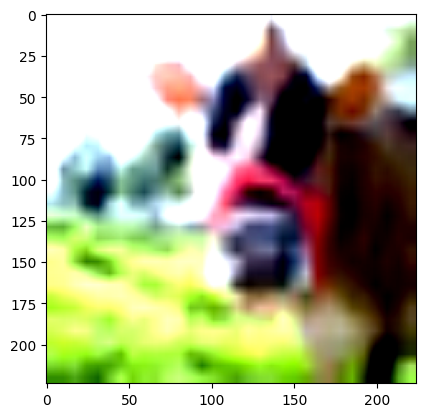

Predicted Label: 55, Class Name: otter


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = torch.nn.Linear(model.classifier.in_features, 100)
model.to(device)
model.eval()

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get an image and its label
img, label = dataset[0]
imshow(img)

# Prepare image for prediction
img = img.unsqueeze(0).to(device)

# Predict the label
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Output
class_names = dataset.classes
predicted_class = class_names[predicted.item()]
print(f'Predicted Label: {predicted.item()}, Class Name: {predicted_class}')


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


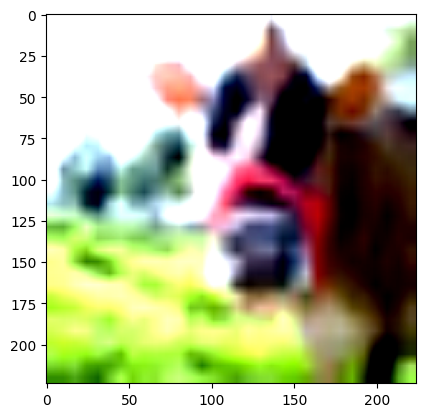

Original Label: 48, Class Name: motorcycle
Predicted Label: 48, Class Name: motorcycle


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

import torch
import torch.nn as nn

class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.1):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return torch.relu(x + noise)
    
def inject_faults(parameters, noise_level):
    """
    Injects Gaussian noise into the gradients of model parameters.
    
    Args:
        parameters (iterable): An iterable of model parameters (typically model.parameters()).
        noise_level (float): Standard deviation of the Gaussian noise to be added.
    """
    with torch.no_grad():
        for param in parameters:
            if param.grad is not None:
                noise = torch.randn_like(param.grad) * noise_level
                param.grad += noise


# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = torch.nn.Linear(model.classifier.in_features, 100)
model.to(device)
model.eval()

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get an image and its label
img, label = dataset[0]
imshow(img)

# Prepare image for prediction
img = img.unsqueeze(0).to(device)

# Function to replace activations
def replace_activations(model, old, new):
    """
    Recursively replaces specified activation functions in a model.

    Args:
    model (nn.Module): The model whose activations are to be replaced.
    old (type): The class of the activation function to replace.
    new (nn.Module): The new activation function module to be used.
    """
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)
            
# Predict the label
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Output
class_names = dataset.classes
predicted_class = class_names[predicted.item()]
print(f'Original Label: {predicted.item()}, Class Name: {predicted_class}')


inject_faults(model.parameters(), noise_level=0.1)

# Replace ReLU with NoisyReLU
# noisy_relu = NoisyReLU(noise_level=0.1)
# replace_activations(model, nn.ReLU, noisy_relu)

# Replace ReLU with Leaky ReLU (faulty ReLU)
# replace_activations(model, torch.nn.ReLU, torch.nn.LeakyReLU(negative_slope=0.01))

# Predict the label
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Output
class_names = dataset.classes
predicted_class = class_names[predicted.item()]
print(f'Predicted Label: {predicted.item()}, Class Name: {predicted_class}')


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

# Define NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.1):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return F.relu(x + noise)

# Function to inject noise into the gradients
def inject_faults(parameters, noise_level=0.01):
    with torch.no_grad():
        for param in parameters:
            if param.grad is not None:
                noise = torch.randn_like(param.grad) * noise_level
                param.grad += noise

# Load the DenseNet model and adjust for CIFAR100
model = torchvision.models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 100)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to replace activation functions in the model
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# Replace ReLU with NoisyReLU
replace_activations(model, nn.ReLU, NoisyReLU(noise_level=0.1))

# Set model to training mode
model.train()

# Prepare data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
img, label = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)[0]
img = img.unsqueeze(0).to(device)
label = torch.tensor([label], dtype=torch.long, device=device)

# Optimizer setup
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Predict before training
model.eval()
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)
original_class = torchvision.datasets.CIFAR100(root='./data', train=True).classes[predicted.item()]
print(f'Original Prediction: {predicted.item()}, Class Name: {original_class}')

# Training pass with fault injection
model.train()
optimizer.zero_grad()
outputs = model(img)
loss = nn.CrossEntropyLoss()(outputs, label)
loss.backward()

# Inject faults into the gradients
inject_faults(model.parameters(), noise_level=0.1)

# Update model parameters
optimizer.step()

# Predict after injecting faults
model.eval()
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)
new_class = torchvision.datasets.CIFAR100(root='./data', train=True).classes[predicted.item()]
print(f'New Prediction after Fault Injection: {predicted.item()}, Class Name: {new_class}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified
Original Prediction: 65, Class Name: rabbit
New Prediction after Fault Injection: 19, Class Name: cattle


In [16]:
import torch
import torchvision.models as models

from pytorchfi.core import fault_injection

batch_size = 1
h = 224
w = 224
c = 3

pfi_model = fault_injection(model, 
                            batch_size,
                            input_shape=[c,h,w],
                            layer_types=[torch.nn.Conv2d],
                            use_cuda=False,
                            )

print(pfi_model.print_pytorchfi_layer_summary())

b, k, layer, C, H, W, err_val = [0,0], [0,2], [7,9], [4,6], [0,0], [0,0], [1000000,2000000]

# inj = pfi_model.declare_neuron_fi(batch=b, layer_num=layer, dim1=C, dim2=H, dim3=W, value=err_val)
inj = pfi_model.declare_weight_fi(layer_num=layer,k=k, dim1=C, dim2=H, dim3=W, value=err_val)

inj_output = inj(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()
print("[Single Error] PytorchFI label:", inj_label)

============================ PYTORCHFI INIT SUMMARY ==============================

Layer types allowing injections:
----------------------------------------------------------------------------------
   - Conv2d

Model Info:
----------------------------------------------------------------------------------
   - Shape of input into the model: (3 224 224 )
   - Batch Size: 1
   - CUDA Enabled: False

Layer Info:
----------------------------------------------------------------------------------
Layer #       Layer type  Dimensions         Weight Shape         Output Shape
----------------------------------------------------------------------------------
    0           Conv2d           4        [64, 3, 7, 7]    [1, 64, 112, 112]
    1           Conv2d           4      [128, 64, 1, 1]     [1, 128, 56, 56]
    2           Conv2d           4      [32, 128, 3, 3]      [1, 32, 56, 56]
    3           Conv2d           4      [128, 96, 1, 1]     [1, 128, 56, 56]
    4           Conv2d           

In [12]:
pfi_model.original_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [13]:
pfi_model.corrupted_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [15]:
pfi_model.get_inj_layer_types()

[torch.nn.modules.conv.Conv2d]

In [19]:
pfi_model.get_layer_type(3)==torch.nn.modules.conv.Conv2d

True

In [20]:
pfi_model.get_total_layers()

120

In [21]:
pfi_model.get_total_batches()


1

In [25]:
pfi_model.get_layer_dim(119)

4

In [36]:
pfi_model = fault_injection(model, 
                            batch_size,
                            input_shape=[c,h,w],
                            layer_types=[torch.nn.Conv2d, torch.nn.Linear],
                            use_cuda=False,
                            )

In [37]:
pfi_model.get_inj_layer_types()


[torch.nn.modules.conv.Conv2d, torch.nn.modules.linear.Linear]

In [38]:
print(pfi_model.print_pytorchfi_layer_summary())


============================ PYTORCHFI INIT SUMMARY ==============================

Layer types allowing injections:
----------------------------------------------------------------------------------
   - Conv2d
   - Linear

Model Info:
----------------------------------------------------------------------------------
   - Shape of input into the model: (3 224 224 )
   - Batch Size: 1
   - CUDA Enabled: False

Layer Info:
----------------------------------------------------------------------------------
Layer #       Layer type  Dimensions         Weight Shape         Output Shape
----------------------------------------------------------------------------------
    0           Conv2d           4        [64, 3, 7, 7]    [1, 64, 112, 112]
    1           Conv2d           4      [128, 64, 1, 1]     [1, 128, 56, 56]
    2           Conv2d           4      [32, 128, 3, 3]      [1, 32, 56, 56]
    3           Conv2d           4      [128, 96, 1, 1]     [1, 128, 56, 56]
    4           Conv2

In [41]:
(b, layer, C, H, W, err_val) = (
            [0, 1],
            [1, 7],
            [5, 150],
            [0, None],
            [0, None],
            [20000, 10000],
        )


inj = pfi_model.declare_weight_fi(layer_num=layer,k=k, dim1=C, dim2=H, dim3=W, value=err_val)


inj_output = inj(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()
print("[Single Error] PytorchFI label:", inj_label)

[Single Error] PytorchFI label: 55


In [43]:
softmax = torch.nn.Softmax(dim=1)

inj_softmax = softmax(inj_output)
inj_label_1 = list(torch.argmax(inj_softmax, dim=1))[0].item()
inj_label_2 = list(torch.argmax(inj_softmax, dim=1))[1].item()

IndexError: list index out of range

In [47]:
import random

def random_value(min_val: int = -1, max_val: int = 1):
    return random.uniform(min_val, max_val)

def random_batch_element():
    return random.randint(0, pfi_model.get_total_batches() - 1)

def random_neuron_location(layer: int = -1):
    if layer == -1:
        layer = random.randint(0, pfi_model.get_total_layers() - 1)

    dim = pfi_model.get_layer_dim(layer)
    shape = pfi_model.get_layer_shape(layer)

    dim1_shape = shape[1]
    dim1_rand = random.randint(0, dim1_shape - 1)
    if dim > 2:
        dim2_shape = shape[2]
        dim2_rand = random.randint(0, dim2_shape - 1)
    else:
        dim2_rand = None
    if dim > 3:
        dim3_shape = shape[3]
        dim3_rand = random.randint(0, dim3_shape - 1)
    else:
        dim3_rand = None

    return (layer, dim1_rand, dim2_rand, dim3_rand)

def random_neuron_inj(pfi_model, min_val: int = -1, max_val: int = 1):
    b = random_batch_element()
    (layer, C, H, W) = random_neuron_location()
    err_val = random_value(min_val=min_val, max_val=max_val)

    return pfi_model.declare_neuron_fi(
        batch=[b], layer_num=[layer], dim1=[C], dim2=[H], dim3=[W], value=[err_val]
    )

corrupt_model = random_neuron_inj(pfi_model, min_val=10000, max_val=20000)

corrupt_model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [48]:
inj_output = corrupt_model(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()
print("[Single Error] PytorchFI label:", inj_label)

[Single Error] PytorchFI label: 49
